In [2]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.colors as mcolors

In [3]:
#loading the data
online_shopping_path = "../starter_code/online_shopping.csv"

In [4]:
#importing the .csv
shopping_data = pd.read_csv(online_shopping_path)


In [5]:
#previewing the data
shopping_data.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [6]:
# looking at the .info for null values and dtypes
shopping_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

In [7]:
# getting the column headings to use for analysis
print(shopping_data.columns)

Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months',
       'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend',
       'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')


In [8]:
#dropping the unnamed and the sku column
clean_shopping_df = shopping_data.drop(['Unnamed: 0','Product_SKU'], axis=1, inplace=False)


In [9]:
#dropping remaining null values
clean_shopping_df = clean_shopping_df.dropna(axis=0, how="any")
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  float64
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  float64
 4   Transaction_ID       52524 non-null  float64
 5   Transaction_Date     52524 non-null  object 
 6   Product_Description  52524 non-null  object 
 7   Product_Category     52524 non-null  object 
 8   Quantity             52524 non-null  float64
 9   Avg_Price            52524 non-null  float64
 10  Delivery_Charges     52524 non-null  float64
 11  Coupon_Status        52524 non-null  object 
 12  GST                  52524 non-null  float64
 13  Date                 52524 non-null  object 
 14  Offline_Spend        52524 non-null  float64
 15  Online_Spend         52524 non-null  floa

In [10]:
#looking at product counts
clean_shopping_df.Product_Category.value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64

In [27]:
#coupon status counts
# i didnt need the coupons, commenting out for readability
#clean_shopping_df.Coupon_Status.value_counts()

In [26]:
# i didnt need the coupons, commenting out for readability
#clean_shopping_df.Coupon_Code.value_counts()

In [13]:
#gender value counts
clean_shopping_df.Gender.value_counts()

Gender
F    32767
M    19757
Name: count, dtype: int64

In [14]:
#location value counts
clean_shopping_df.Location.value_counts()

Location
Chicago          18240
California       16008
New York         11097
New Jersey        4470
Washington DC     2709
Name: count, dtype: int64

In [15]:
# convert date to month, day, year
clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])
clean_shopping_df["Transaction_Date"] = clean_shopping_df["Transaction_Date"].dt.strftime("%m-%d-%Y")

clean_shopping_df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,01-01-2019,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,01-01-2019,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,01-01-2019,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


In [16]:
#clean_shopping_df.tail()
#clean_shopping_df["Transaction_Date"] = pd.to_datetime(clean_shopping_df["Transaction_Date"])

In [17]:
clean_shopping_df.tail()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52919,13155.0,F,California,8.0,22504.0,03-10-2019,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,03-28-2019,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,10-06-2019,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,10-06-2019,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52923,13659.0,F,Chicago,8.0,39998.0,10-06-2019,Google Spiral Journal with Pen,Notebooks & Journals,1.0,5.59,6.5,Not Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


In [18]:
#combining new york and new jersy into one group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New York": "New Jersey"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Chicago          18240
California       16008
New Jersey       15567
Washington DC     2709
Name: count, dtype: int64>

In [19]:
#combining washington DC and the new jersey group
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"New Jersey": "Washington DC"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
Washington DC    18276
Chicago          18240
California       16008
Name: count, dtype: int64>

In [20]:
#renaming the group to northeast
clean_shopping_df["Location"] = clean_shopping_df.Location.replace({"Washington DC": "North East"})
clean_shopping_df.Location.value_counts().head

<bound method NDFrame.head of Location
North East    18276
Chicago       18240
California    16008
Name: count, dtype: int64>

In [21]:
#combining nest canada and nest usa
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-Canada": "Nest-USA"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest-USA                14330
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [22]:
#grouping all the nest categories together
clean_shopping_df["Product_Category"] = clean_shopping_df.Product_Category.replace({"Nest-USA": "Nest"})
clean_shopping_df.Product_Category.value_counts().head

<bound method NDFrame.head of Product_Category
Apparel                 18126
Nest                    16528
Office                   6513
Drinkware                3483
Lifestyle                3092
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Bottles                   268
Accessories               234
Gift Cards                159
Housewares                122
Android                    43
Name: count, dtype: int64>

In [24]:
project_colors = ["#FF8360","#E8E288","#7DCE82","#E8E288","#00FFF5"]
sns.set_palette(project_colors)

In [26]:
clean_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52524 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52524 non-null  float64
 1   Gender               52524 non-null  object 
 2   Location             52524 non-null  object 
 3   Tenure_Months        52524 non-null  float64
 4   Transaction_ID       52524 non-null  float64
 5   Transaction_Date     52524 non-null  object 
 6   Product_Description  52524 non-null  object 
 7   Product_Category     52524 non-null  object 
 8   Quantity             52524 non-null  float64
 9   Avg_Price            52524 non-null  float64
 10  Delivery_Charges     52524 non-null  float64
 11  Coupon_Status        52524 non-null  object 
 12  GST                  52524 non-null  float64
 13  Date                 52524 non-null  object 
 14  Offline_Spend        52524 non-null  float64
 15  Online_Spend         52524 non-null  floa

**Inital Heatmap to get an idea of what kind of relationships might be present**

In [28]:
corrs = clean_shopping_df.corr(numeric_only = True)
corrs

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
CustomerID,1.000000,-0.023816,-0.091303,-0.008158,0.004321,-0.005956,-0.000050,-0.004118,-0.017440,-0.090152,0.000337
Tenure_Months,-0.023816,1.000000,0.021634,0.006807,-0.000916,-0.014535,-0.001652,0.040147,0.025451,0.018878,0.029703
Transaction_ID,-0.091303,0.021634,1.000000,-0.028466,0.124854,-0.084902,-0.099080,0.200343,0.165640,0.995521,0.241759
Quantity,-0.008158,0.006807,-0.028466,1.000000,-0.114066,0.191787,-0.028219,-0.004583,0.010647,-0.027297,-0.011381
Avg_Price,0.004321,-0.000916,0.124854,-0.114066,1.000000,-0.108026,-0.575806,0.094083,0.060772,0.118675,0.027688
Delivery_Charges,-0.005956,-0.014535,-0.084902,0.191787,-0.108026,1.000000,0.029983,-0.013219,-0.019590,-0.085363,-0.018870
GST,-0.000050,-0.001652,-0.099080,-0.028219,-0.575806,0.029983,1.000000,-0.073077,-0.046616,-0.094246,-0.012852
Offline_Spend,-0.004118,0.040147,0.200343,-0.004583,0.094083,-0.013219,-0.073077,1.000000,0.336336,0.201543,0.051719
Online_Spend,-0.017440,0.025451,0.165640,0.010647,0.060772,-0.019590,-0.046616,0.336336,1.000000,0.165820,0.024343
Month,-0.090152,0.018878,0.995521,-0.027297,0.118675,-0.085363,-0.094246,0.201543,0.165820,1.000000,0.236194


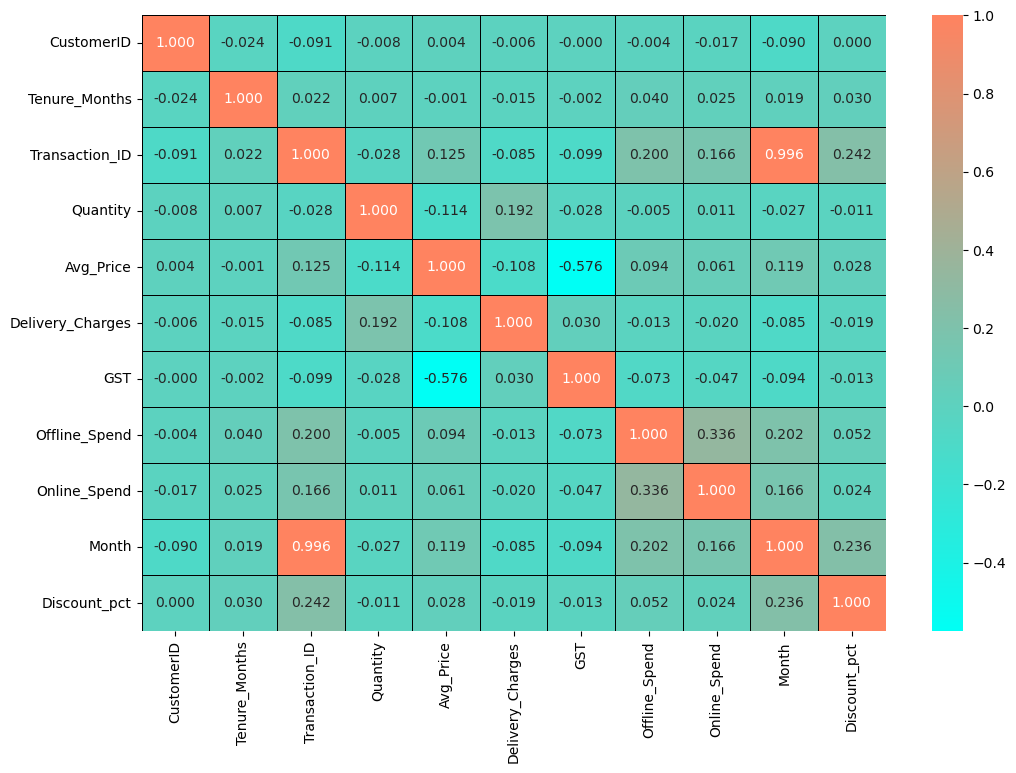

In [29]:
# Define the colors for the gradient diverging color palette
colors = ["#00FFF5", "#FF8360"]  # Blue, Yellow, Red

# Create a gradient color map using LinearSegmentedColormap
color_map = mcolors.LinearSegmentedColormap.from_list("my_palette", colors)

#making the heatmap a better size
plt.figure(figsize=(12, 8))

# Create a heatmap with the gradient diverging color palette
sns.heatmap(corrs, cmap=color_map, linewidths=0.5, linecolor='black', annot = True, fmt=".3f")

plt.savefig("Heatmap")
plt.show()

***Question 1: Is there a difference between men and womens spending habits, ei: do men have fewer transactions but higher cost items vs women many small transactions with smaller transactions?***

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM for online shopping
# leaderboard

online_mean = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].mean()
online_median = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].median()
online_variance = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].var()
online_stand_dev = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].std()
online_sem = clean_shopping_df.groupby(["Location","Gender"])["Online_Spend"].sem()

online_data = {
    "Online Avg": online_mean,
    "Online Med": online_median,
    "Online Var": online_variance,
    "Online Stand Dev": online_stand_dev,
    "Online SEM": online_sem
}

online_leaderboard = pd.DataFrame(online_data).reset_index()
online_leaderboard

,Location,Gender,Online Avg,Online Med,Online Var,Online Stand Dev,Online SEM
0,California,F,1955.178420,1880.22,736505.498605,858.198985,8.668234
1,California,M,1776.553688,1696.64,625993.779132,791.197687,10.043362
2,Chicago,F,1867.223676,1827.02,608654.840454,780.163342,7.307220
3,Chicago,M,1898.182701,1870.67,541209.958268,735.669735,8.894532
4,North East,F,1888.501010,1783.56,649381.096948,805.841856,7.493043
5,North East,M,1965.651091,2011.57,715694.418111,845.987245,10.327675


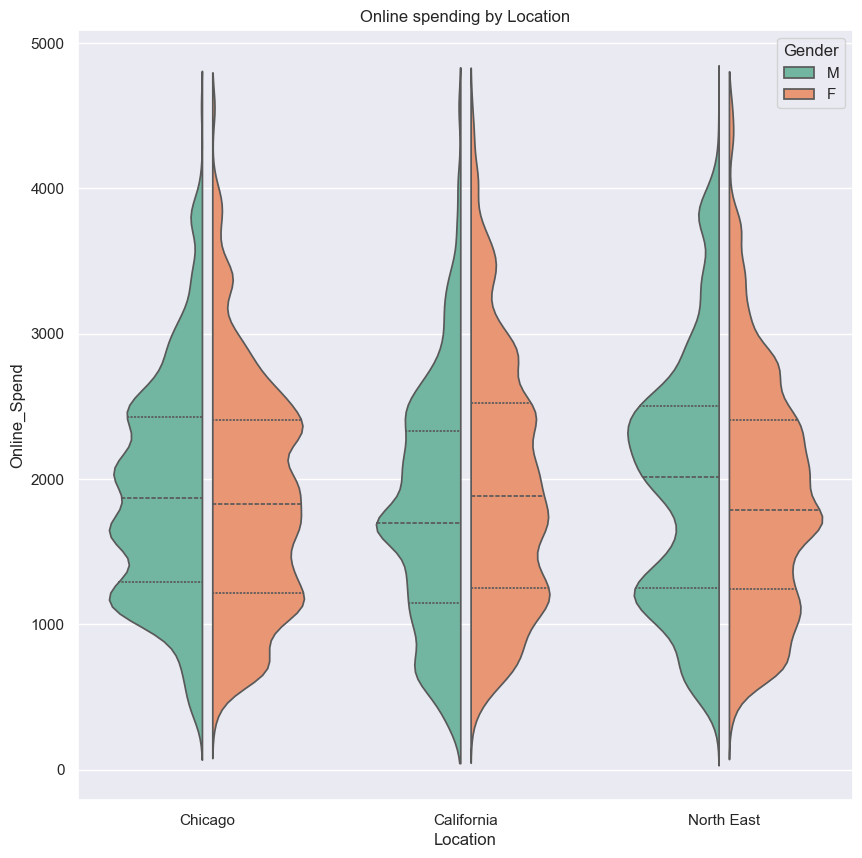

In [32]:
#testing a side by side violin plot
# Python program to illustrate
# violinplot using inbuilt data-set
# given in seaborn
  
# use to set style of background of plot
sns.set(style="whitegrid")
sns.set_theme(rc={"figure.figsize":(10,10)})

 
sns.violinplot(x="Location", y="Online_Spend", hue="Gender",
                    data=clean_shopping_df, palette="Set2", split=True, gap=.1,
                    density_norm="count", inner="quart", legend="full" ).set(title="Online spending by Location")
plt.savefig("Online_Spend")

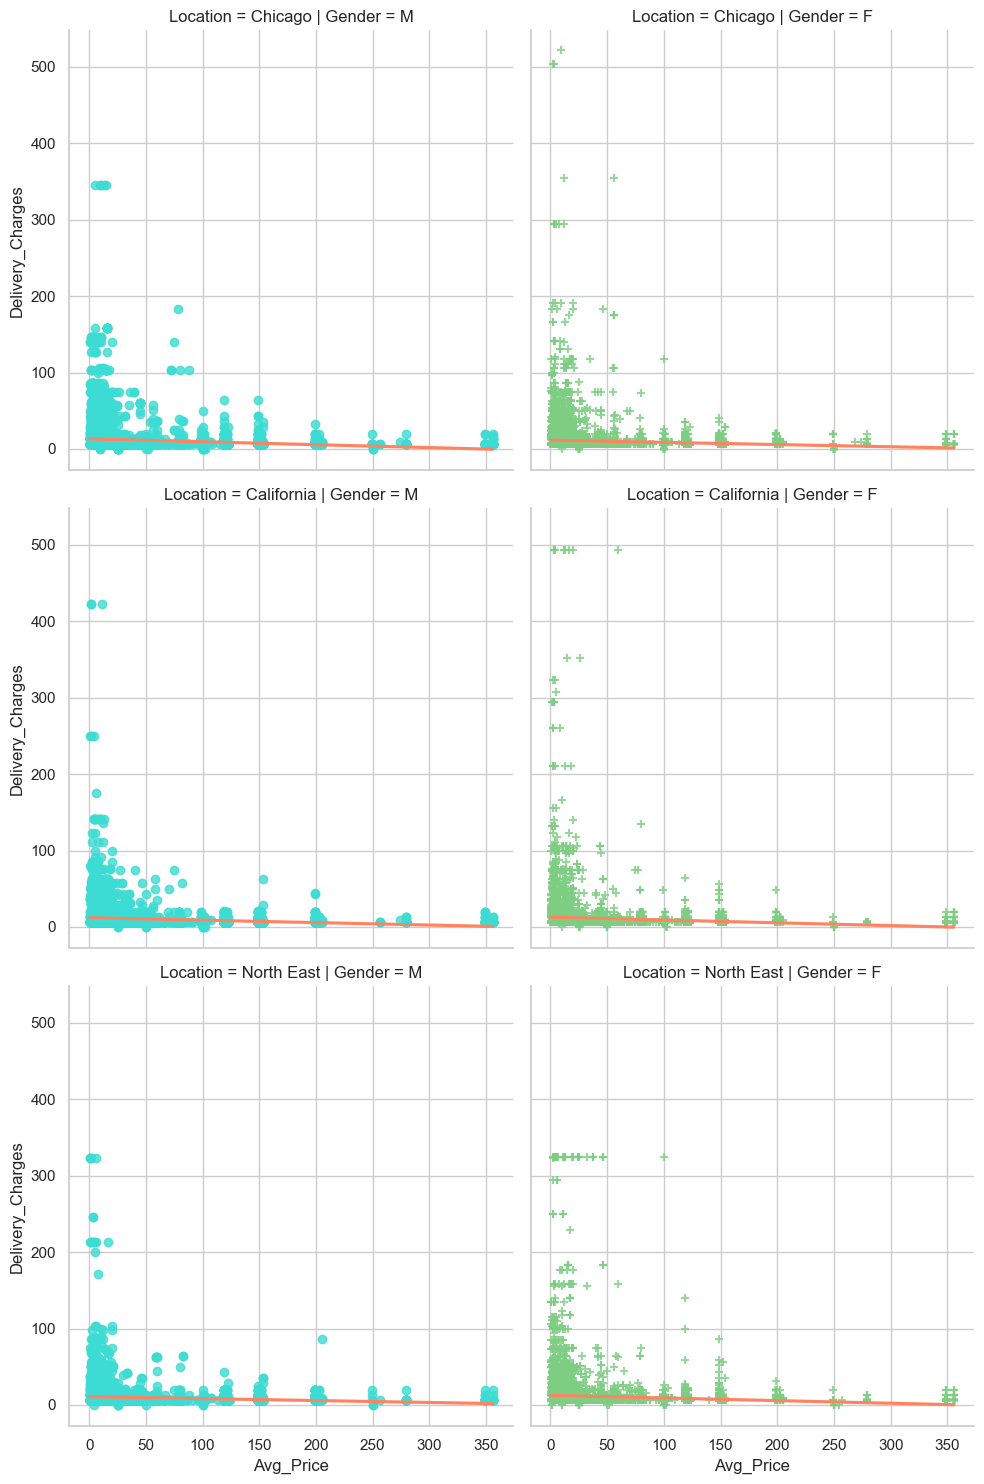

In [58]:
sns.lmplot(x="Avg_Price", y="Delivery_Charges", hue="Gender",
           col="Gender", row="Location", data=clean_shopping_df,markers=["o", "+"], 
           palette=["#3CDBD3","#7DCE82"],line_kws={'color': '#FF8360'}, fit_reg = True)


plt.show()


#still need to figure out how to add the dang r values

***Question 2: Shipping prices: are people more willing to spend more on delivery if the cost of the item is more?***

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


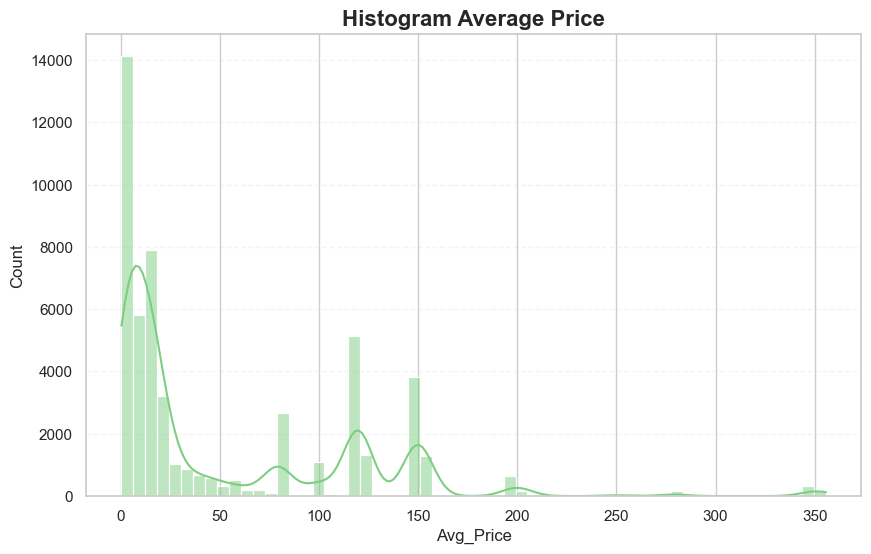

In [37]:
#HISTOGRAM AND AVERAGE PRICE
# Step 1: get the data
x = clean_shopping_df["Avg_Price"]

# create the plot
plt.figure(figsize=(10,6))
sns.histplot(data=x, color="#7DCE82", kde=True) #, bins=20)

# customizations
plt.title("Histogram Average Price", fontsize=16, fontweight="bold")
# plt.ylim(0, 275)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

The r-squared is: 0.011669530024367334


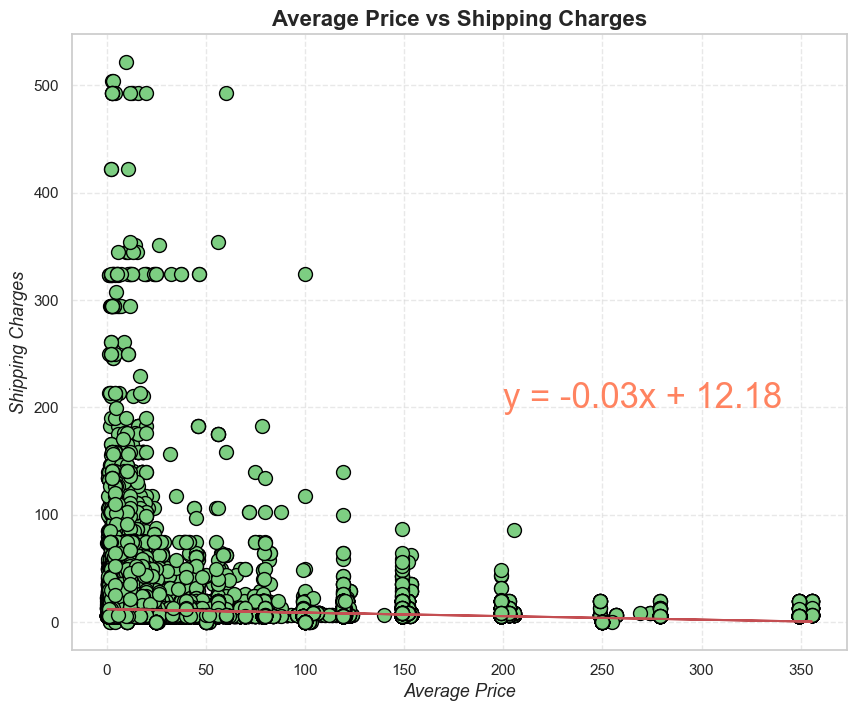

In [61]:
# Build scatter plot for item cost vs shipping cost
x = clean_shopping_df["Avg_Price"]
y = clean_shopping_df["Delivery_Charges"]

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))

plt.scatter(x, y, facecolor="#7DCE82", edgecolor="black", s=100)
# Incorporate the other graph properties
plt.xlabel("Average Price", fontsize=13, fontstyle="italic")
plt.ylabel("Shipping Charges", fontsize=13, fontstyle="italic")
plt.title("Average Price vs Shipping Charges", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle="--", alpha=0.5)

plt.plot(x_values, regress_values, "r-") # plot the line of best fit
plt.annotate(line_eq,(200, 200),fontsize=25,color="#FF8360")

# Show plot
print(f"The r-squared is: {rvalue**2}")
plt.savefig("avg_price_vs_shipping")

plt.show()



In [ ]:
# websites that i get code from

#adding the regression line for the seaborn plots
https://stackoverflow.com/questions/25579227/seaborn-lmplot-with-equation-and-r2-text

#setting the violin plot sizing
https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot

#had issues with blank figures saving this fixed it
https://stackoverflow.com/questions/9012487/savefig-outputs-blank-image

#